EMOTION DETECTOR

IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten ,Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation ,MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG ,Image
import tensorflow as tf
print("tensorflow version: ",tf.__version__)



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


tensorflow version:  2.13.0


EXPLORING DATASETS

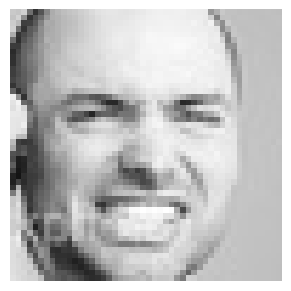

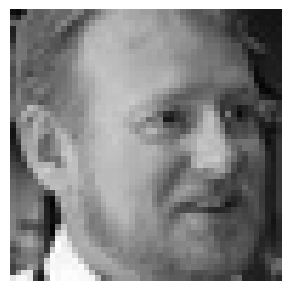

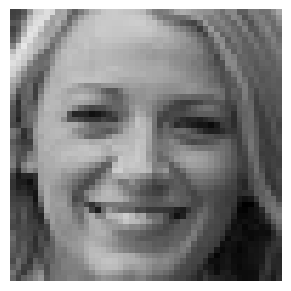

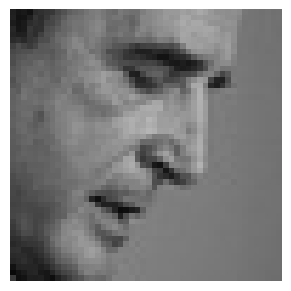

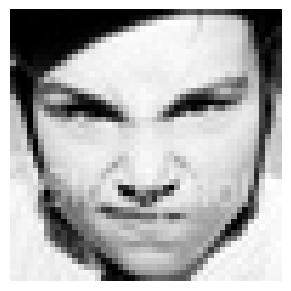

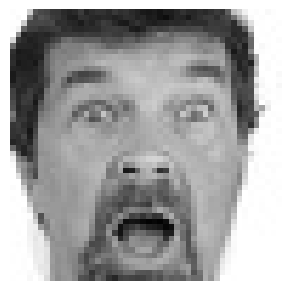

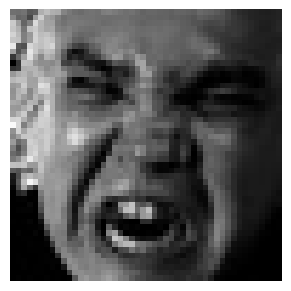

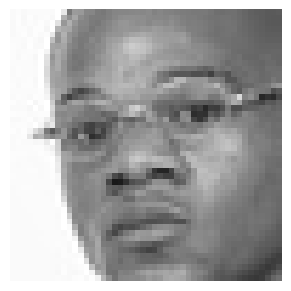

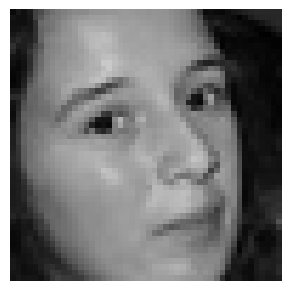

In [2]:
images= glob("/kaggle/input/fer2013/train/**/**")
for i in range(9):
    image= random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image)); plt.axis('off')
    

PREPARING DATA FOR TRAINING

In [3]:
img_size=48
batch_size=64
datagen_train = ImageDataGenerator(horizontal_flip= True)
train_generator = datagen_train.flow_from_directory("/kaggle/input/fer2013/train/",
                                                   target_size=(img_size,img_size),
                                                    color_mode= "grayscale",
                                                    batch_size= batch_size,
                                                    class_mode = "categorical",
                                                    shuffle =  True)
datagen_validation = ImageDataGenerator(horizontal_flip= True)
validation_generator = datagen_train.flow_from_directory("/kaggle/input/fer2013/test/",
                                                   target_size=(img_size,img_size),
                                                    color_mode= "grayscale",
                                                    batch_size= batch_size,
                                                    class_mode = "categorical",
                                                    shuffle =  True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


DEFINING MODEL

In [4]:
def Convolution(input_tensor,filters,kernel_size ):
    x= Conv2D(filters= filters, kernel_size= kernel_size, padding= "same")(input_tensor)
    x= BatchNormalization()(x)
    x= Activation('relu')(x)
    x= MaxPooling2D(pool_size=(2,2))(x)
    x= Dropout(0.25)(x)
    return x

In [5]:
def Dense_f (input_tensor, nodes):
    x= Dense(nodes)(input_tensor)
    x= BatchNormalization()(x)
    x= Activation('relu')(x)
    x= Dropout(0.25)(x)
    return x
    

In [6]:
def model_fer(input_shape):
    inputs= Input(input_shape)
    conv_1 =Convolution(inputs,64,(3,3))
    conv_2 =Convolution(conv_1,128,(5,5))
    conv_3 =Convolution(conv_2,512,(3,3))
    conv_4 =Convolution(conv_2,512,(3,3))

    flatten = Flatten()(conv_4)
    dense_1 = Dense_f(flatten,256)
    dense_2 = Dense_f(dense_1,512)
    output = Dense(7,activation= "softmax")(dense_2)
    model = Model(inputs= [inputs], outputs= [output])
    opt = Adam(lr=0.0005)
    model.compile(loss= ['categorical_crossentropy'],optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [7]:
model= model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0     

INITIALISING MODEL

In [9]:
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size
checkpoint = ModelCheckpoint("model_weights.h5", monitor = 'val_accuracy', save_weights_only = True, mode = 'max', verbose = 1)
reduce_lr= ReduceLROnPlateau(monitor='val_loss', factor= 0.1, patience=2 , min_lr = 0.00001)
callbacks = [checkpoint,reduce_lr]

TRAINING THE MODEL

THE NEXT CELL TAKES TIME TO COMPLETE

In [10]:
history = model.fit(
    x= train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

    

Epoch 1/15


2023-12-31 01:51:15.405382: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


448/448 [==============================] - ETA: 0s - loss: 1.6813 - accuracy: 0.3588
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 206s 419ms/step - loss: 1.6813 - accuracy: 0.3588 - val_loss: 1.4623 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3606 - accuracy: 0.4796
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 55s 123ms/step - loss: 1.3606 - accuracy: 0.4796 - val_loss: 1.4000 - val_accuracy: 0.4674 - lr: 0.0010
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.2514 - accuracy: 0.5212
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 54s 120ms/step - loss: 1.2514 - accuracy: 0.5212 - val_loss: 1.4219 - val_accuracy: 0.4528 - lr: 0.0010
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.1857 - accuracy: 0.5510
Epoch 4: saving model to model_weights.h5
448/448 [========

MODEL EVALUATION

In [11]:
model.evaluate(validation_generator)

113/113 [==============================] - 16s 143ms/step - loss: 1.0172 - accuracy: 0.6275


[1.0172014236450195, 0.6274728178977966]

PLOTTING LOSS

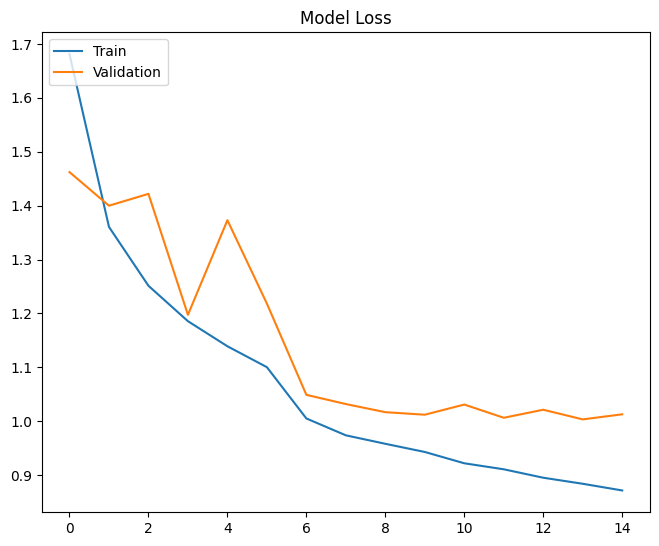

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'], loc= 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

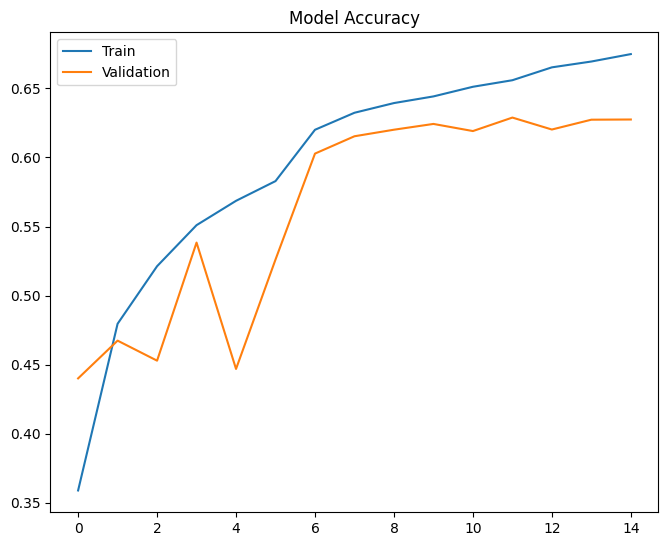

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'], loc= 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

SAVING MODEL

In [14]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)